## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.03242 | train_mse: 0.52771 | train_mae: 0.58028 |  0:00:00s


epoch 1  | loss: 0.26122 | train_mse: 0.25586 | train_mae: 0.40877 |  0:00:01s


epoch 2  | loss: 0.19333 | train_mse: 0.15527 | train_mae: 0.31863 |  0:00:02s


epoch 3  | loss: 0.18862 | train_mse: 0.16467 | train_mae: 0.32853 |  0:00:03s


epoch 4  | loss: 0.16177 | train_mse: 0.11893 | train_mae: 0.28182 |  0:00:04s


epoch 5  | loss: 0.19108 | train_mse: 0.19264 | train_mae: 0.3299  |  0:00:04s


epoch 6  | loss: 0.19796 | train_mse: 0.12535 | train_mae: 0.28116 |  0:00:05s


epoch 7  | loss: 0.13874 | train_mse: 0.10655 | train_mae: 0.26097 |  0:00:05s


epoch 8  | loss: 0.12819 | train_mse: 0.0949  | train_mae: 0.24488 |  0:00:06s


epoch 9  | loss: 0.12168 | train_mse: 0.08098 | train_mae: 0.22537 |  0:00:06s


epoch 10 | loss: 0.11457 | train_mse: 0.07656 | train_mae: 0.22017 |  0:00:07s


epoch 11 | loss: 0.1335  | train_mse: 0.07052 | train_mae: 0.20922 |  0:00:08s


epoch 12 | loss: 0.09095 | train_mse: 0.057   | train_mae: 0.18699 |  0:00:08s


epoch 13 | loss: 0.09474 | train_mse: 0.06644 | train_mae: 0.20386 |  0:00:09s


epoch 14 | loss: 0.10262 | train_mse: 0.05366 | train_mae: 0.18128 |  0:00:09s


epoch 15 | loss: 0.06875 | train_mse: 0.0458  | train_mae: 0.17127 |  0:00:10s


epoch 16 | loss: 0.08145 | train_mse: 0.0479  | train_mae: 0.16768 |  0:00:10s


epoch 17 | loss: 0.06902 | train_mse: 0.0457  | train_mae: 0.17756 |  0:00:11s


epoch 18 | loss: 0.06389 | train_mse: 0.03264 | train_mae: 0.14869 |  0:00:12s


epoch 19 | loss: 0.08212 | train_mse: 0.04132 | train_mae: 0.16331 |  0:00:12s


epoch 20 | loss: 0.07697 | train_mse: 0.05399 | train_mae: 0.18947 |  0:00:13s


epoch 21 | loss: 0.06558 | train_mse: 0.03251 | train_mae: 0.13923 |  0:00:13s


epoch 22 | loss: 0.0733  | train_mse: 0.0355  | train_mae: 0.14752 |  0:00:14s


epoch 23 | loss: 0.06389 | train_mse: 0.02489 | train_mae: 0.1232  |  0:00:14s


epoch 24 | loss: 0.06663 | train_mse: 0.02855 | train_mae: 0.13471 |  0:00:15s


epoch 25 | loss: 0.06933 | train_mse: 0.02506 | train_mae: 0.12777 |  0:00:15s


epoch 26 | loss: 0.05933 | train_mse: 0.02891 | train_mae: 0.13481 |  0:00:16s


epoch 27 | loss: 0.05362 | train_mse: 0.0299  | train_mae: 0.13537 |  0:00:17s


epoch 28 | loss: 0.06444 | train_mse: 0.04194 | train_mae: 0.16004 |  0:00:17s


epoch 29 | loss: 0.06746 | train_mse: 0.02763 | train_mae: 0.13163 |  0:00:18s


epoch 30 | loss: 0.06698 | train_mse: 0.02702 | train_mae: 0.1245  |  0:00:18s


epoch 31 | loss: 0.07116 | train_mse: 0.03999 | train_mae: 0.16513 |  0:00:19s


epoch 32 | loss: 0.06486 | train_mse: 0.05903 | train_mae: 0.20096 |  0:00:19s


epoch 33 | loss: 0.0626  | train_mse: 0.0417  | train_mae: 0.15757 |  0:00:20s


epoch 34 | loss: 0.07397 | train_mse: 0.03713 | train_mae: 0.16077 |  0:00:21s


epoch 35 | loss: 0.0839  | train_mse: 0.03232 | train_mae: 0.15146 |  0:00:21s


epoch 36 | loss: 0.05017 | train_mse: 0.03557 | train_mae: 0.14805 |  0:00:22s


epoch 37 | loss: 0.05041 | train_mse: 0.02661 | train_mae: 0.12783 |  0:00:22s


epoch 38 | loss: 0.06276 | train_mse: 0.02952 | train_mae: 0.13749 |  0:00:23s


epoch 39 | loss: 0.05036 | train_mse: 0.02234 | train_mae: 0.11648 |  0:00:23s


epoch 40 | loss: 0.06206 | train_mse: 0.02466 | train_mae: 0.12884 |  0:00:24s


epoch 41 | loss: 0.04994 | train_mse: 0.02125 | train_mae: 0.11265 |  0:00:25s


epoch 42 | loss: 0.04834 | train_mse: 0.02222 | train_mae: 0.11888 |  0:00:25s


epoch 43 | loss: 0.04135 | train_mse: 0.01796 | train_mae: 0.10305 |  0:00:26s


epoch 44 | loss: 0.03634 | train_mse: 0.01895 | train_mae: 0.11254 |  0:00:26s


epoch 45 | loss: 0.04188 | train_mse: 0.02266 | train_mae: 0.12395 |  0:00:27s


epoch 46 | loss: 0.05412 | train_mse: 0.02749 | train_mae: 0.1233  |  0:00:28s


epoch 47 | loss: 0.04408 | train_mse: 0.02786 | train_mae: 0.12541 |  0:00:28s


epoch 48 | loss: 0.04508 | train_mse: 0.01319 | train_mae: 0.09167 |  0:00:29s


epoch 49 | loss: 0.04336 | train_mse: 0.01036 | train_mae: 0.07946 |  0:00:29s


epoch 50 | loss: 0.04801 | train_mse: 0.01847 | train_mae: 0.10601 |  0:00:30s


epoch 51 | loss: 0.04169 | train_mse: 0.02053 | train_mae: 0.11146 |  0:00:30s


epoch 52 | loss: 0.04236 | train_mse: 0.0145  | train_mae: 0.0943  |  0:00:31s


epoch 53 | loss: 0.04691 | train_mse: 0.0154  | train_mae: 0.09469 |  0:00:32s


epoch 54 | loss: 0.04859 | train_mse: 0.02108 | train_mae: 0.11152 |  0:00:32s


epoch 55 | loss: 0.03795 | train_mse: 0.01463 | train_mae: 0.09749 |  0:00:33s


epoch 56 | loss: 0.0445  | train_mse: 0.01444 | train_mae: 0.08989 |  0:00:33s


epoch 57 | loss: 0.05138 | train_mse: 0.01995 | train_mae: 0.11697 |  0:00:34s


epoch 58 | loss: 0.0406  | train_mse: 0.01438 | train_mae: 0.0986  |  0:00:34s


epoch 59 | loss: 0.0461  | train_mse: 0.01735 | train_mae: 0.1008  |  0:00:35s


epoch 60 | loss: 0.0362  | train_mse: 0.01417 | train_mae: 0.09486 |  0:00:35s


epoch 61 | loss: 0.04661 | train_mse: 0.02619 | train_mae: 0.12916 |  0:00:36s


epoch 62 | loss: 0.03567 | train_mse: 0.01277 | train_mae: 0.08718 |  0:00:37s


epoch 63 | loss: 0.05346 | train_mse: 0.01495 | train_mae: 0.0893  |  0:00:37s


epoch 64 | loss: 0.03819 | train_mse: 0.01647 | train_mae: 0.09804 |  0:00:38s


epoch 65 | loss: 0.05574 | train_mse: 0.01955 | train_mae: 0.1038  |  0:00:38s


epoch 66 | loss: 0.04164 | train_mse: 0.01696 | train_mae: 0.10568 |  0:00:39s


epoch 67 | loss: 0.0371  | train_mse: 0.01411 | train_mae: 0.08947 |  0:00:39s


epoch 68 | loss: 0.03358 | train_mse: 0.01782 | train_mae: 0.10523 |  0:00:40s


epoch 69 | loss: 0.04065 | train_mse: 0.02225 | train_mae: 0.12413 |  0:00:40s


epoch 70 | loss: 0.04483 | train_mse: 0.05134 | train_mae: 0.17281 |  0:00:41s


epoch 71 | loss: 0.06091 | train_mse: 0.0184  | train_mae: 0.11073 |  0:00:42s


epoch 72 | loss: 0.04852 | train_mse: 0.03717 | train_mae: 0.1588  |  0:00:42s


epoch 73 | loss: 0.03876 | train_mse: 0.01975 | train_mae: 0.11165 |  0:00:43s


epoch 74 | loss: 0.03667 | train_mse: 0.01694 | train_mae: 0.10784 |  0:00:43s


epoch 75 | loss: 0.03321 | train_mse: 0.01903 | train_mae: 0.09764 |  0:00:44s


epoch 76 | loss: 0.04472 | train_mse: 0.02048 | train_mae: 0.10528 |  0:00:44s


epoch 77 | loss: 0.03649 | train_mse: 0.01371 | train_mae: 0.08053 |  0:00:45s


epoch 78 | loss: 0.03392 | train_mse: 0.01247 | train_mae: 0.08743 |  0:00:45s


epoch 79 | loss: 0.04954 | train_mse: 0.02064 | train_mae: 0.11427 |  0:00:46s


epoch 80 | loss: 0.0377  | train_mse: 0.00962 | train_mae: 0.07652 |  0:00:47s


epoch 81 | loss: 0.03666 | train_mse: 0.01    | train_mae: 0.0751  |  0:00:47s


epoch 82 | loss: 0.02823 | train_mse: 0.01045 | train_mae: 0.08001 |  0:00:48s


epoch 83 | loss: 0.02635 | train_mse: 0.01249 | train_mae: 0.09062 |  0:00:48s


epoch 84 | loss: 0.0304  | train_mse: 0.01666 | train_mae: 0.10254 |  0:00:49s


epoch 85 | loss: 0.03678 | train_mse: 0.01652 | train_mae: 0.10449 |  0:00:49s


epoch 86 | loss: 0.04915 | train_mse: 0.01675 | train_mae: 0.10223 |  0:00:50s


epoch 87 | loss: 0.04958 | train_mse: 0.01362 | train_mae: 0.08597 |  0:00:50s


epoch 88 | loss: 0.03083 | train_mse: 0.01177 | train_mae: 0.0764  |  0:00:51s


epoch 89 | loss: 0.03935 | train_mse: 0.0107  | train_mae: 0.08223 |  0:00:52s


epoch 90 | loss: 0.03247 | train_mse: 0.01492 | train_mae: 0.0984  |  0:00:52s


epoch 91 | loss: 0.04452 | train_mse: 0.01596 | train_mae: 0.08967 |  0:00:53s


epoch 92 | loss: 0.03583 | train_mse: 0.00963 | train_mae: 0.07266 |  0:00:53s


epoch 93 | loss: 0.02153 | train_mse: 0.01063 | train_mae: 0.0759  |  0:00:54s


epoch 94 | loss: 0.02914 | train_mse: 0.01648 | train_mae: 0.09249 |  0:00:55s


epoch 95 | loss: 0.03691 | train_mse: 0.01377 | train_mae: 0.08256 |  0:00:55s


epoch 96 | loss: 0.03019 | train_mse: 0.00909 | train_mae: 0.07157 |  0:00:56s


epoch 97 | loss: 0.03517 | train_mse: 0.00824 | train_mae: 0.06626 |  0:00:56s


epoch 98 | loss: 0.03404 | train_mse: 0.00921 | train_mae: 0.07387 |  0:00:57s


epoch 99 | loss: 0.02795 | train_mse: 0.01334 | train_mae: 0.08513 |  0:00:57s


epoch 100| loss: 0.03196 | train_mse: 0.01493 | train_mae: 0.09377 |  0:00:58s


epoch 101| loss: 0.02763 | train_mse: 0.00989 | train_mae: 0.07079 |  0:00:59s


epoch 102| loss: 0.04221 | train_mse: 0.01588 | train_mae: 0.08004 |  0:00:59s


epoch 103| loss: 0.0303  | train_mse: 0.01471 | train_mae: 0.08238 |  0:01:00s


epoch 104| loss: 0.04474 | train_mse: 0.01882 | train_mae: 0.09462 |  0:01:00s


epoch 105| loss: 0.04148 | train_mse: 0.01105 | train_mae: 0.08121 |  0:01:01s


epoch 106| loss: 0.04721 | train_mse: 0.01466 | train_mae: 0.09678 |  0:01:01s


epoch 107| loss: 0.02742 | train_mse: 0.00968 | train_mae: 0.07986 |  0:01:02s


epoch 108| loss: 0.02266 | train_mse: 0.00719 | train_mae: 0.06409 |  0:01:02s


epoch 109| loss: 0.02669 | train_mse: 0.00785 | train_mae: 0.0667  |  0:01:03s


epoch 110| loss: 0.03918 | train_mse: 0.01028 | train_mae: 0.07516 |  0:01:04s


epoch 111| loss: 0.03457 | train_mse: 0.00787 | train_mae: 0.06603 |  0:01:04s


epoch 112| loss: 0.03541 | train_mse: 0.00758 | train_mae: 0.07304 |  0:01:05s


epoch 113| loss: 0.03481 | train_mse: 0.01968 | train_mae: 0.10823 |  0:01:05s


epoch 114| loss: 0.03281 | train_mse: 0.01214 | train_mae: 0.0814  |  0:01:06s


epoch 115| loss: 0.03048 | train_mse: 0.02089 | train_mae: 0.11495 |  0:01:06s


epoch 116| loss: 0.03712 | train_mse: 0.01131 | train_mae: 0.07984 |  0:01:07s


epoch 117| loss: 0.02696 | train_mse: 0.01639 | train_mae: 0.09577 |  0:01:07s


epoch 118| loss: 0.029   | train_mse: 0.01211 | train_mae: 0.07462 |  0:01:08s


epoch 119| loss: 0.04366 | train_mse: 0.0074  | train_mae: 0.06339 |  0:01:09s


epoch 120| loss: 0.03162 | train_mse: 0.00925 | train_mae: 0.07323 |  0:01:09s


epoch 121| loss: 0.02553 | train_mse: 0.00681 | train_mae: 0.06336 |  0:01:10s


epoch 122| loss: 0.02644 | train_mse: 0.01957 | train_mae: 0.10069 |  0:01:10s


epoch 123| loss: 0.04165 | train_mse: 0.02689 | train_mae: 0.12188 |  0:01:11s


epoch 124| loss: 0.032   | train_mse: 0.02389 | train_mae: 0.13273 |  0:01:11s


epoch 125| loss: 0.02975 | train_mse: 0.01907 | train_mae: 0.11214 |  0:01:12s


epoch 126| loss: 0.02735 | train_mse: 0.01043 | train_mae: 0.07735 |  0:01:13s


epoch 127| loss: 0.02515 | train_mse: 0.01052 | train_mae: 0.08359 |  0:01:13s


epoch 128| loss: 0.03035 | train_mse: 0.01339 | train_mae: 0.08446 |  0:01:14s


epoch 129| loss: 0.02307 | train_mse: 0.01175 | train_mae: 0.08396 |  0:01:14s


epoch 130| loss: 0.02634 | train_mse: 0.00607 | train_mae: 0.06137 |  0:01:15s


epoch 131| loss: 0.02329 | train_mse: 0.01487 | train_mae: 0.08794 |  0:01:15s


epoch 132| loss: 0.02545 | train_mse: 0.01456 | train_mae: 0.0928  |  0:01:16s


epoch 133| loss: 0.02013 | train_mse: 0.00956 | train_mae: 0.07942 |  0:01:16s


epoch 134| loss: 0.03463 | train_mse: 0.01194 | train_mae: 0.09096 |  0:01:17s


epoch 135| loss: 0.02966 | train_mse: 0.0102  | train_mae: 0.0815  |  0:01:18s


epoch 136| loss: 0.02155 | train_mse: 0.01408 | train_mae: 0.1038  |  0:01:18s


epoch 137| loss: 0.02565 | train_mse: 0.00879 | train_mae: 0.07327 |  0:01:19s


epoch 138| loss: 0.0254  | train_mse: 0.00846 | train_mae: 0.07016 |  0:01:19s


epoch 139| loss: 0.02529 | train_mse: 0.00777 | train_mae: 0.06626 |  0:01:20s


epoch 140| loss: 0.02146 | train_mse: 0.01053 | train_mae: 0.07685 |  0:01:20s


epoch 141| loss: 0.04268 | train_mse: 0.01186 | train_mae: 0.08672 |  0:01:21s


epoch 142| loss: 0.03019 | train_mse: 0.01628 | train_mae: 0.09361 |  0:01:21s


epoch 143| loss: 0.03204 | train_mse: 0.01088 | train_mae: 0.07839 |  0:01:22s


epoch 144| loss: 0.0211  | train_mse: 0.00796 | train_mae: 0.0661  |  0:01:23s


epoch 145| loss: 0.0269  | train_mse: 0.01219 | train_mae: 0.08607 |  0:01:23s


epoch 146| loss: 0.03179 | train_mse: 0.0098  | train_mae: 0.07578 |  0:01:24s


epoch 147| loss: 0.02526 | train_mse: 0.00731 | train_mae: 0.06105 |  0:01:24s


epoch 148| loss: 0.02728 | train_mse: 0.00955 | train_mae: 0.07394 |  0:01:25s


epoch 149| loss: 0.02254 | train_mse: 0.0113  | train_mae: 0.07602 |  0:01:25s


epoch 150| loss: 0.03182 | train_mse: 0.01114 | train_mae: 0.08131 |  0:01:26s


epoch 151| loss: 0.03243 | train_mse: 0.03404 | train_mae: 0.111   |  0:01:27s


epoch 152| loss: 0.03807 | train_mse: 0.02936 | train_mae: 0.12656 |  0:01:27s


epoch 153| loss: 0.03664 | train_mse: 0.01559 | train_mae: 0.10368 |  0:01:28s


epoch 154| loss: 0.02526 | train_mse: 0.01132 | train_mae: 0.0809  |  0:01:28s


epoch 155| loss: 0.02792 | train_mse: 0.00847 | train_mae: 0.07388 |  0:01:29s


epoch 156| loss: 0.03619 | train_mse: 0.00928 | train_mae: 0.07749 |  0:01:30s


epoch 157| loss: 0.02701 | train_mse: 0.01248 | train_mae: 0.09188 |  0:01:30s


epoch 158| loss: 0.05045 | train_mse: 0.01337 | train_mae: 0.09038 |  0:01:31s


epoch 159| loss: 0.02794 | train_mse: 0.01109 | train_mae: 0.07878 |  0:01:31s


epoch 160| loss: 0.02631 | train_mse: 0.00846 | train_mae: 0.06825 |  0:01:32s


epoch 161| loss: 0.02767 | train_mse: 0.00657 | train_mae: 0.05913 |  0:01:32s


epoch 162| loss: 0.02914 | train_mse: 0.00665 | train_mae: 0.06302 |  0:01:33s


epoch 163| loss: 0.02541 | train_mse: 0.01123 | train_mae: 0.07502 |  0:01:33s


epoch 164| loss: 0.03066 | train_mse: 0.01832 | train_mae: 0.0846  |  0:01:34s


epoch 165| loss: 0.02047 | train_mse: 0.0226  | train_mae: 0.10332 |  0:01:34s


epoch 166| loss: 0.03214 | train_mse: 0.02987 | train_mae: 0.14702 |  0:01:35s


epoch 167| loss: 0.04172 | train_mse: 0.02577 | train_mae: 0.12623 |  0:01:36s


epoch 168| loss: 0.03428 | train_mse: 0.01711 | train_mae: 0.10519 |  0:01:36s


epoch 169| loss: 0.02658 | train_mse: 0.00928 | train_mae: 0.0707  |  0:01:37s


epoch 170| loss: 0.02773 | train_mse: 0.00983 | train_mae: 0.07502 |  0:01:37s


epoch 171| loss: 0.03188 | train_mse: 0.01069 | train_mae: 0.08613 |  0:01:38s


epoch 172| loss: 0.0298  | train_mse: 0.01946 | train_mae: 0.09341 |  0:01:38s


epoch 173| loss: 0.03825 | train_mse: 0.02478 | train_mae: 0.11622 |  0:01:39s


epoch 174| loss: 0.04184 | train_mse: 0.01532 | train_mae: 0.09362 |  0:01:40s


epoch 175| loss: 0.03261 | train_mse: 0.0214  | train_mae: 0.11985 |  0:01:40s


epoch 176| loss: 0.02617 | train_mse: 0.01757 | train_mae: 0.09693 |  0:01:41s


epoch 177| loss: 0.02837 | train_mse: 0.0088  | train_mae: 0.06438 |  0:01:41s


epoch 178| loss: 0.02763 | train_mse: 0.0078  | train_mae: 0.06593 |  0:01:42s


epoch 179| loss: 0.04613 | train_mse: 0.00785 | train_mae: 0.05777 |  0:01:42s


epoch 180| loss: 0.02977 | train_mse: 0.00968 | train_mae: 0.07232 |  0:01:43s


epoch 181| loss: 0.02415 | train_mse: 0.01256 | train_mae: 0.0832  |  0:01:44s


epoch 182| loss: 0.02043 | train_mse: 0.00661 | train_mae: 0.06004 |  0:01:44s


epoch 183| loss: 0.02266 | train_mse: 0.01053 | train_mae: 0.07622 |  0:01:45s


epoch 184| loss: 0.02499 | train_mse: 0.00966 | train_mae: 0.07328 |  0:01:45s


epoch 185| loss: 0.02034 | train_mse: 0.01389 | train_mae: 0.0919  |  0:01:46s


epoch 186| loss: 0.05169 | train_mse: 0.00838 | train_mae: 0.07194 |  0:01:46s


epoch 187| loss: 0.03006 | train_mse: 0.02101 | train_mae: 0.10444 |  0:01:47s


epoch 188| loss: 0.02952 | train_mse: 0.01166 | train_mae: 0.08927 |  0:01:47s


epoch 189| loss: 0.01802 | train_mse: 0.00844 | train_mae: 0.06738 |  0:01:48s


epoch 190| loss: 0.02243 | train_mse: 0.00581 | train_mae: 0.05834 |  0:01:49s


epoch 191| loss: 0.01932 | train_mse: 0.01301 | train_mae: 0.07952 |  0:01:49s


epoch 192| loss: 0.02268 | train_mse: 0.0079  | train_mae: 0.0668  |  0:01:50s


epoch 193| loss: 0.02092 | train_mse: 0.0122  | train_mae: 0.08636 |  0:01:50s


epoch 194| loss: 0.02569 | train_mse: 0.01084 | train_mae: 0.07503 |  0:01:51s


epoch 195| loss: 0.02319 | train_mse: 0.00955 | train_mae: 0.07771 |  0:01:51s


epoch 196| loss: 0.03253 | train_mse: 0.01252 | train_mae: 0.09053 |  0:01:52s


epoch 197| loss: 0.01935 | train_mse: 0.01436 | train_mae: 0.09823 |  0:01:52s


epoch 198| loss: 0.02274 | train_mse: 0.00622 | train_mae: 0.06126 |  0:01:53s


epoch 199| loss: 0.01928 | train_mse: 0.0128  | train_mae: 0.09214 |  0:01:54s


epoch 200| loss: 0.03135 | train_mse: 0.01179 | train_mae: 0.07685 |  0:01:54s


epoch 201| loss: 0.0243  | train_mse: 0.01158 | train_mae: 0.08535 |  0:01:55s


epoch 202| loss: 0.02503 | train_mse: 0.00686 | train_mae: 0.0615  |  0:01:55s


epoch 203| loss: 0.02135 | train_mse: 0.00731 | train_mae: 0.06459 |  0:01:56s


epoch 204| loss: 0.03191 | train_mse: 0.01139 | train_mae: 0.076   |  0:01:56s


epoch 205| loss: 0.02771 | train_mse: 0.00949 | train_mae: 0.06967 |  0:01:57s


epoch 206| loss: 0.02547 | train_mse: 0.00871 | train_mae: 0.06933 |  0:01:57s


epoch 207| loss: 0.02263 | train_mse: 0.00751 | train_mae: 0.06421 |  0:01:58s


epoch 208| loss: 0.02169 | train_mse: 0.00732 | train_mae: 0.06833 |  0:01:59s


epoch 209| loss: 0.02418 | train_mse: 0.00776 | train_mae: 0.07018 |  0:01:59s


epoch 210| loss: 0.02429 | train_mse: 0.00942 | train_mae: 0.07237 |  0:02:00s


epoch 211| loss: 0.02221 | train_mse: 0.01044 | train_mae: 0.07391 |  0:02:00s


epoch 212| loss: 0.02869 | train_mse: 0.01718 | train_mae: 0.09958 |  0:02:01s


epoch 213| loss: 0.03126 | train_mse: 0.01465 | train_mae: 0.08384 |  0:02:01s


epoch 214| loss: 0.03671 | train_mse: 0.02029 | train_mae: 0.0983  |  0:02:02s


epoch 215| loss: 0.03421 | train_mse: 0.00711 | train_mae: 0.0617  |  0:02:03s


epoch 216| loss: 0.02568 | train_mse: 0.00768 | train_mae: 0.07049 |  0:02:03s


epoch 217| loss: 0.01935 | train_mse: 0.00641 | train_mae: 0.06422 |  0:02:04s


epoch 218| loss: 0.0224  | train_mse: 0.00581 | train_mae: 0.05486 |  0:02:04s


epoch 219| loss: 0.02193 | train_mse: 0.00665 | train_mae: 0.06163 |  0:02:05s


epoch 220| loss: 0.02469 | train_mse: 0.00717 | train_mae: 0.06769 |  0:02:05s


epoch 221| loss: 0.02431 | train_mse: 0.00849 | train_mae: 0.07746 |  0:02:06s


epoch 222| loss: 0.02206 | train_mse: 0.00773 | train_mae: 0.06844 |  0:02:06s


epoch 223| loss: 0.03097 | train_mse: 0.00596 | train_mae: 0.06203 |  0:02:07s


epoch 224| loss: 0.02999 | train_mse: 0.01188 | train_mae: 0.09128 |  0:02:08s


epoch 225| loss: 0.02217 | train_mse: 0.01059 | train_mae: 0.08253 |  0:02:08s


epoch 226| loss: 0.02367 | train_mse: 0.00659 | train_mae: 0.05892 |  0:02:09s


epoch 227| loss: 0.02594 | train_mse: 0.00929 | train_mae: 0.06832 |  0:02:09s


epoch 228| loss: 0.02947 | train_mse: 0.01022 | train_mae: 0.07845 |  0:02:10s


epoch 229| loss: 0.03069 | train_mse: 0.00934 | train_mae: 0.06465 |  0:02:10s


epoch 230| loss: 0.02914 | train_mse: 0.00837 | train_mae: 0.06721 |  0:02:11s


epoch 231| loss: 0.02447 | train_mse: 0.0178  | train_mae: 0.096   |  0:02:11s


epoch 232| loss: 0.02782 | train_mse: 0.01052 | train_mae: 0.07498 |  0:02:12s


epoch 233| loss: 0.01352 | train_mse: 0.00812 | train_mae: 0.06721 |  0:02:13s


epoch 234| loss: 0.02873 | train_mse: 0.01485 | train_mae: 0.08804 |  0:02:13s


epoch 235| loss: 0.02229 | train_mse: 0.00556 | train_mae: 0.05721 |  0:02:14s


epoch 236| loss: 0.02855 | train_mse: 0.00526 | train_mae: 0.05444 |  0:02:14s


epoch 237| loss: 0.02647 | train_mse: 0.00901 | train_mae: 0.07276 |  0:02:15s


epoch 238| loss: 0.01984 | train_mse: 0.0086  | train_mae: 0.07775 |  0:02:15s


epoch 239| loss: 0.03056 | train_mse: 0.01125 | train_mae: 0.08326 |  0:02:16s


epoch 240| loss: 0.03529 | train_mse: 0.01287 | train_mae: 0.08899 |  0:02:16s


epoch 241| loss: 0.02996 | train_mse: 0.01159 | train_mae: 0.07725 |  0:02:17s


epoch 242| loss: 0.03943 | train_mse: 0.01151 | train_mae: 0.07704 |  0:02:18s


epoch 243| loss: 0.03993 | train_mse: 0.01788 | train_mae: 0.10228 |  0:02:18s


epoch 244| loss: 0.03372 | train_mse: 0.01805 | train_mae: 0.09677 |  0:02:19s


epoch 245| loss: 0.02659 | train_mse: 0.01413 | train_mae: 0.09335 |  0:02:19s


epoch 246| loss: 0.02775 | train_mse: 0.01217 | train_mae: 0.08482 |  0:02:20s


epoch 247| loss: 0.02336 | train_mse: 0.01463 | train_mae: 0.09349 |  0:02:20s


epoch 248| loss: 0.02461 | train_mse: 0.01154 | train_mae: 0.08455 |  0:02:21s


epoch 249| loss: 0.01736 | train_mse: 0.00759 | train_mae: 0.06687 |  0:02:22s


epoch 250| loss: 0.01649 | train_mse: 0.00628 | train_mae: 0.06135 |  0:02:22s


epoch 251| loss: 0.02882 | train_mse: 0.01019 | train_mae: 0.07784 |  0:02:23s


epoch 252| loss: 0.02601 | train_mse: 0.00622 | train_mae: 0.06138 |  0:02:23s


epoch 253| loss: 0.02363 | train_mse: 0.00834 | train_mae: 0.06741 |  0:02:24s


epoch 254| loss: 0.02175 | train_mse: 0.00979 | train_mae: 0.07314 |  0:02:24s


epoch 255| loss: 0.02853 | train_mse: 0.01089 | train_mae: 0.08056 |  0:02:25s


epoch 256| loss: 0.02798 | train_mse: 0.01947 | train_mae: 0.11215 |  0:02:25s


epoch 257| loss: 0.02733 | train_mse: 0.01121 | train_mae: 0.08836 |  0:02:26s


epoch 258| loss: 0.02206 | train_mse: 0.00662 | train_mae: 0.06647 |  0:02:27s


epoch 259| loss: 0.01714 | train_mse: 0.00767 | train_mae: 0.07144 |  0:02:27s


epoch 260| loss: 0.03829 | train_mse: 0.01169 | train_mae: 0.08701 |  0:02:28s


epoch 261| loss: 0.02643 | train_mse: 0.0069  | train_mae: 0.06087 |  0:02:28s


epoch 262| loss: 0.02375 | train_mse: 0.0101  | train_mae: 0.07519 |  0:02:29s


epoch 263| loss: 0.02671 | train_mse: 0.00728 | train_mae: 0.06573 |  0:02:30s


epoch 264| loss: 0.02114 | train_mse: 0.00684 | train_mae: 0.06466 |  0:02:30s


epoch 265| loss: 0.02128 | train_mse: 0.00524 | train_mae: 0.05443 |  0:02:31s


epoch 266| loss: 0.03079 | train_mse: 0.01239 | train_mae: 0.07884 |  0:02:31s


epoch 267| loss: 0.0218  | train_mse: 0.01014 | train_mae: 0.07862 |  0:02:32s


epoch 268| loss: 0.02713 | train_mse: 0.00843 | train_mae: 0.0727  |  0:02:32s


epoch 269| loss: 0.02142 | train_mse: 0.00743 | train_mae: 0.06927 |  0:02:33s


epoch 270| loss: 0.03095 | train_mse: 0.00881 | train_mae: 0.07285 |  0:02:34s


epoch 271| loss: 0.01956 | train_mse: 0.01156 | train_mae: 0.07887 |  0:02:34s


epoch 272| loss: 0.02726 | train_mse: 0.01173 | train_mae: 0.08455 |  0:02:35s


epoch 273| loss: 0.02828 | train_mse: 0.00704 | train_mae: 0.06533 |  0:02:35s


epoch 274| loss: 0.02361 | train_mse: 0.0084  | train_mae: 0.07449 |  0:02:36s


epoch 275| loss: 0.02085 | train_mse: 0.01042 | train_mae: 0.07788 |  0:02:36s


epoch 276| loss: 0.02485 | train_mse: 0.01561 | train_mae: 0.09782 |  0:02:37s


epoch 277| loss: 0.02808 | train_mse: 0.01296 | train_mae: 0.08071 |  0:02:38s


epoch 278| loss: 0.02117 | train_mse: 0.00784 | train_mae: 0.06683 |  0:02:38s


epoch 279| loss: 0.02538 | train_mse: 0.014   | train_mae: 0.0857  |  0:02:39s


epoch 280| loss: 0.03105 | train_mse: 0.01654 | train_mae: 0.09438 |  0:02:39s


epoch 281| loss: 0.02912 | train_mse: 0.01101 | train_mae: 0.07625 |  0:02:40s


epoch 282| loss: 0.02567 | train_mse: 0.01172 | train_mae: 0.07425 |  0:02:40s


epoch 283| loss: 0.01925 | train_mse: 0.00896 | train_mae: 0.06952 |  0:02:41s


epoch 284| loss: 0.02587 | train_mse: 0.00588 | train_mae: 0.05616 |  0:02:41s


epoch 285| loss: 0.02045 | train_mse: 0.00604 | train_mae: 0.05713 |  0:02:42s


epoch 286| loss: 0.05647 | train_mse: 0.01104 | train_mae: 0.08162 |  0:02:43s


epoch 287| loss: 0.02652 | train_mse: 0.00728 | train_mae: 0.06301 |  0:02:43s


epoch 288| loss: 0.02066 | train_mse: 0.00751 | train_mae: 0.07038 |  0:02:44s


epoch 289| loss: 0.02864 | train_mse: 0.00823 | train_mae: 0.06966 |  0:02:44s


epoch 290| loss: 0.02608 | train_mse: 0.00843 | train_mae: 0.06529 |  0:02:45s


epoch 291| loss: 0.02015 | train_mse: 0.01134 | train_mae: 0.07768 |  0:02:45s


epoch 292| loss: 0.01984 | train_mse: 0.00924 | train_mae: 0.07216 |  0:02:46s


epoch 293| loss: 0.02448 | train_mse: 0.00754 | train_mae: 0.06182 |  0:02:47s


epoch 294| loss: 0.0217  | train_mse: 0.00618 | train_mae: 0.06012 |  0:02:47s


epoch 295| loss: 0.01952 | train_mse: 0.00898 | train_mae: 0.06756 |  0:02:48s


epoch 296| loss: 0.03303 | train_mse: 0.00766 | train_mae: 0.06571 |  0:02:48s


epoch 297| loss: 0.01647 | train_mse: 0.00771 | train_mae: 0.06871 |  0:02:49s


epoch 298| loss: 0.03031 | train_mse: 0.01395 | train_mae: 0.08473 |  0:02:49s


epoch 299| loss: 0.03533 | train_mse: 0.00869 | train_mae: 0.06875 |  0:02:50s


epoch 300| loss: 0.02567 | train_mse: 0.00592 | train_mae: 0.05895 |  0:02:50s


epoch 301| loss: 0.02885 | train_mse: 0.00593 | train_mae: 0.06046 |  0:02:51s


epoch 302| loss: 0.03073 | train_mse: 0.01092 | train_mae: 0.07507 |  0:02:52s


epoch 303| loss: 0.02756 | train_mse: 0.01431 | train_mae: 0.08051 |  0:02:52s


epoch 304| loss: 0.03117 | train_mse: 0.01032 | train_mae: 0.07233 |  0:02:53s


epoch 305| loss: 0.02076 | train_mse: 0.00847 | train_mae: 0.06814 |  0:02:53s


epoch 306| loss: 0.01948 | train_mse: 0.00831 | train_mae: 0.06755 |  0:02:54s


epoch 307| loss: 0.02494 | train_mse: 0.00683 | train_mae: 0.05813 |  0:02:54s


epoch 308| loss: 0.02012 | train_mse: 0.01    | train_mae: 0.0666  |  0:02:55s


epoch 309| loss: 0.01539 | train_mse: 0.00852 | train_mae: 0.06575 |  0:02:55s


epoch 310| loss: 0.02931 | train_mse: 0.0065  | train_mae: 0.05855 |  0:02:56s


epoch 311| loss: 0.02864 | train_mse: 0.00679 | train_mae: 0.06273 |  0:02:57s


epoch 312| loss: 0.02188 | train_mse: 0.03142 | train_mae: 0.12985 |  0:02:57s


epoch 313| loss: 0.01836 | train_mse: 0.0135  | train_mae: 0.07915 |  0:02:58s


epoch 314| loss: 0.0207  | train_mse: 0.00723 | train_mae: 0.06425 |  0:02:59s


epoch 315| loss: 0.0244  | train_mse: 0.01298 | train_mae: 0.08868 |  0:03:00s

Early stopping occurred at epoch 315 with best_epoch = 265 and best_train_mae = 0.05443
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.06406883276483827


ABC Pre-generator MAE 0.10520785778001286


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

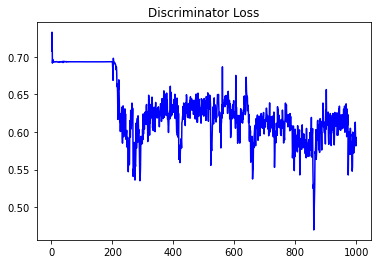

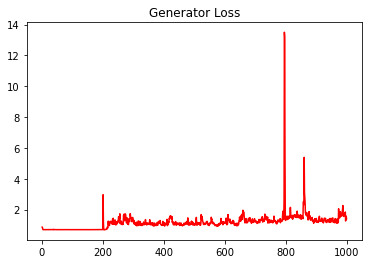

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.09740989805622534


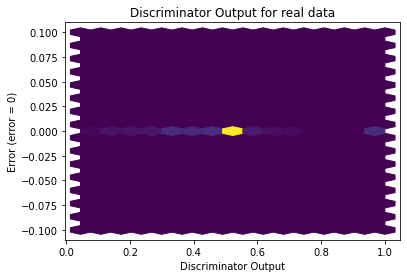

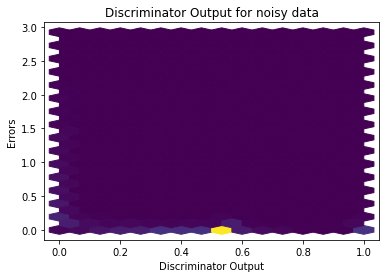

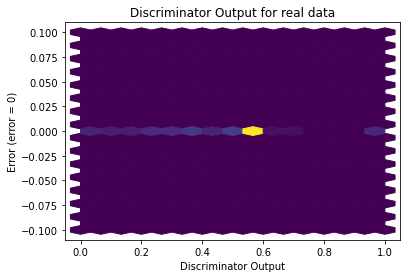

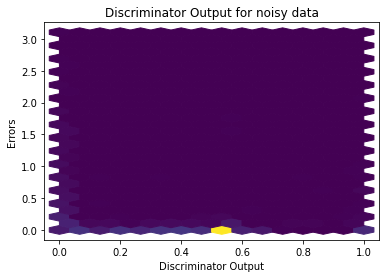

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

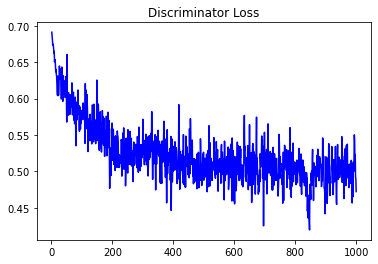

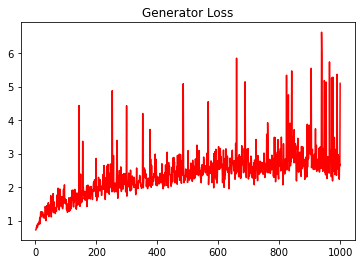

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.08943557156370832


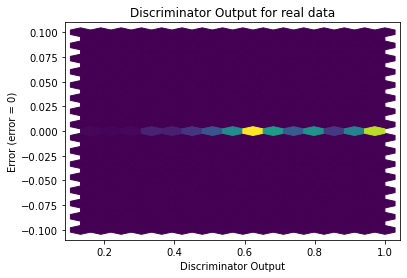

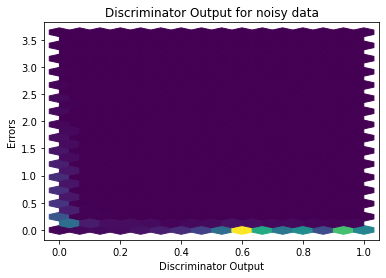

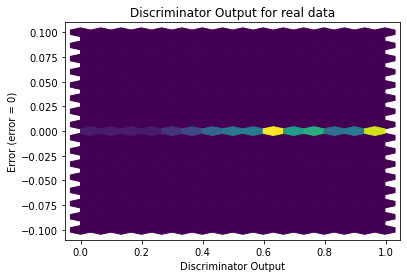

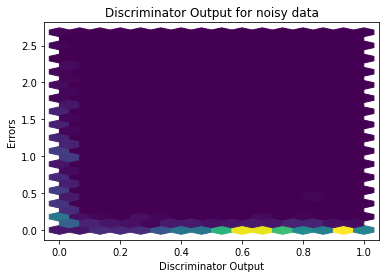

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


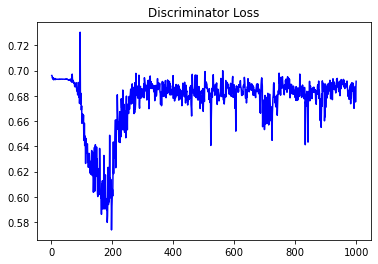

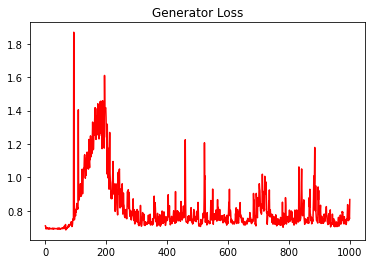

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.06899986507346878


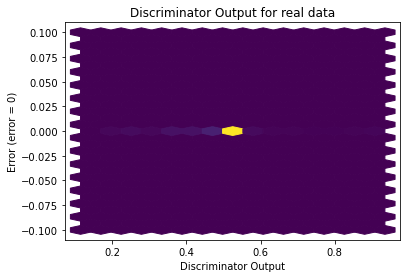

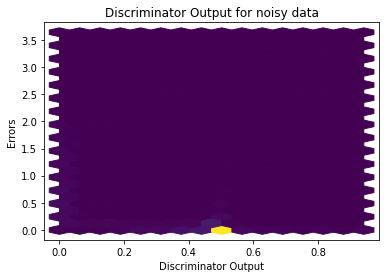

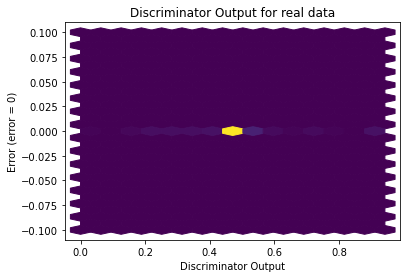

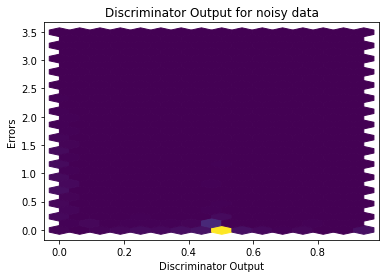

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


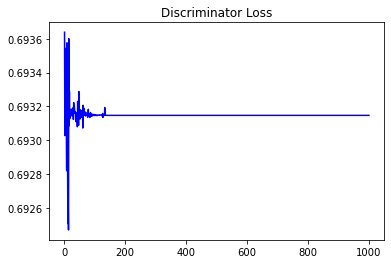

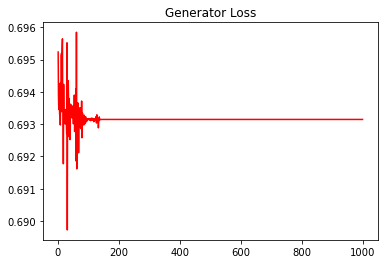

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.09982164445345278


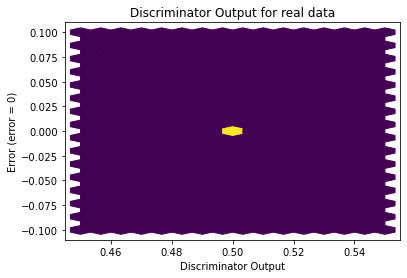

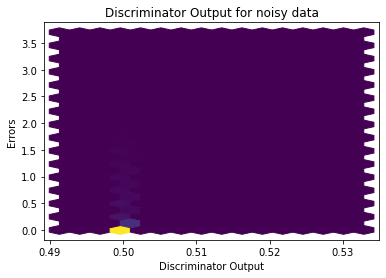

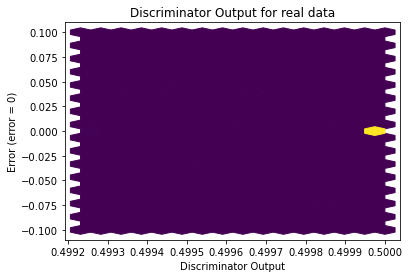

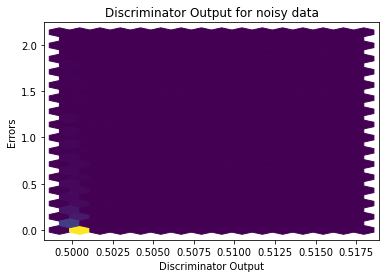

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1474]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0420]], requires_grad=True)
